# Angular Inflation with Anguelova

In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

#import inflatox
import inflatox

In [2]:
sympy.init_printing()
#setup the coordinates
p, x = sympy.symbols("phi chi")
coords = [p, x]
d = len(coords)

#setup the potential
mp, mx, a = sympy.symbols("m_phi m_chi alpha")
V = a/2 * ( (mp*p)**2 + (mx*x)**2 ).nsimplify()

#setup the metric
metric_diagonal = 6*a / (1 - p**2 - x**2)**2
metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = metric_diagonal
metric[1][1] = metric_diagonal
metric = MetricTensor(metric, coords)

#display the metric and potential
display(metric.tensor())
display(V)

⎡      6⋅α                         ⎤
⎢────────────────         0        ⎥
⎢               2                  ⎥
⎢⎛   2    2    ⎞                   ⎥
⎢⎝- χ  - φ  + 1⎠                   ⎥
⎢                                  ⎥
⎢                        6⋅α       ⎥
⎢       0          ────────────────⎥
⎢                                 2⎥
⎢                  ⎛   2    2    ⎞ ⎥
⎣                  ⎝- χ  - φ  + 1⎠ ⎦

In [12]:
hesse = inflatox.SymbolicCalculation.new(
  coords,
  metric,
  V,
  assertions=False,
  simplification_depth=2
).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

In [5]:
out = inflatox.Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
phi -> x[0]
chi -> x[1]
alpha -> args[0]
m_chi -> args[1]
m_phi -> args[2]


In [6]:
lib = inflatox.consistency_conditions.InflationCondition(out).dylib

In [9]:
args = np.array([1.0, 1.5, 1.5])
x = np.zeros((10_000, 10_000))
start_stop = np.array([
  [-10.0, 10.0],
  [-10.0, 10.0]
])

inflatox.libinflx_rs.anguelova(
  lib,
  args,
  x,
  start_stop
)

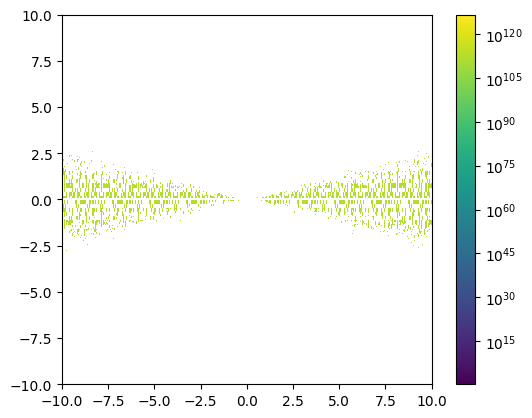

In [10]:
plt.imshow(x, norm=LogNorm(), extent=(*start_stop[0], *start_stop[1]))
plt.colorbar()